# Imports

In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scripts.ksplot import make_ks_plot

# Latex settings block

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.numpoints": 1,
    "axes.linewidth": 2,
    "legend.title_fontsize": 18,
    "axes.labelsize": 18,
    "legend.fontsize": 16
})

# Load training and validation arrays along with their labels and variable and label names
# Such files is created by the make_npz_tracks.py script

In [3]:
with np.load("root_files/combined_tracks_train.npz") as f:
    X_train = f['features']
    y_train = f['labels']
    features = list(f['names'])
    
with np.load("root_files/combined_tracks_validate.npz") as f:
    X_test = f['features']
    y_test = f['labels']

In [4]:
# X_train = np.swapaxes(X_train,1,2)
# X_test = np.swapaxes(X_test,1,2)
# X_train = X_train.reshape((X_train.shape[0],10,28))
# X_test = X_test.reshape((X_test.shape[0],10,28))

# Build a simple neural network in keras

In [5]:
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(units=280,activation='relu'))
model.add(Dense(units=280,activation='relu'))
model.add(Dense(units=280,activation='relu'))
model.add(Dense(units=2,activation='softmax'))
opt = keras.optimizers.SGD(0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 280)               0         
                                                                 
 batch_normalization (BatchN  (None, 280)              1120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 280)               78680     
                                                                 
 dense_1 (Dense)             (None, 280)               78680     
                                                                 
 dense_2 (Dense)             (None, 280)               78680     
                                                                 
 dense_3 (Dense)             (None, 2)                 562       
                                                        

# Define the callbacks for the model

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('keras_model_best.h5', monitor='val_loss', save_best_only=True)
# callbacks = [early_stopping, model_checkpoint]
callbacks = [model_checkpoint]

# Train the model

In [7]:
history = model.fit(X_train, y_train, batch_size=2**16, 
                    epochs=500, callbacks = callbacks, 
                    validation_data=(X_test,y_test))

Epoch 1/500


2022-12-06 00:39:54.291120: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 23s 482ms/step - loss: 0.6112 - accuracy: 0.6759 - val_loss: 0.5928 - val_accuracy: 0.7215
Epoch 2/500
47/47 [==============================] - 12s 256ms/step - loss: 0.5367 - accuracy: 0.7560 - val_loss: 0.5474 - val_accuracy: 0.7595
Epoch 3/500
47/47 [==============================] - 12s 245ms/step - loss: 0.4989 - accuracy: 0.7753 - val_loss: 0.5141 - val_accuracy: 0.7727
Epoch 4/500
47/47 [==============================] - 12s 247ms/step - loss: 0.4739 - accuracy: 0.7856 - val_loss: 0.4882 - val_accuracy: 0.7810
Epoch 5/500
47/47 [==============================] - 12s 245ms/step - loss: 0.4555 - accuracy: 0.7926 - val_loss: 0.4674 - val_accuracy: 0.7876
Epoch 6/500
47/47 [==============================] - 12s 249ms/step - loss: 0.4414 - accuracy: 0.7980 - val_loss: 0.4509 - val_accuracy: 0.7934
Epoch 7/500
47/47 [==============================] - 11s 242ms/step - loss: 0.4305 - accuracy: 0.8023 - val_loss: 0.4380 - val_accuracy: 0.7982
Epoc

47/47 [==============================] - 11s 243ms/step - loss: 0.2895 - accuracy: 0.8747 - val_loss: 0.2923 - val_accuracy: 0.8729
Epoch 114/500
47/47 [==============================] - 11s 243ms/step - loss: 0.2892 - accuracy: 0.8749 - val_loss: 0.2919 - val_accuracy: 0.8730
Epoch 115/500
47/47 [==============================] - 11s 242ms/step - loss: 0.2888 - accuracy: 0.8750 - val_loss: 0.2915 - val_accuracy: 0.8732
Epoch 116/500
47/47 [==============================] - 11s 242ms/step - loss: 0.2884 - accuracy: 0.8752 - val_loss: 0.2911 - val_accuracy: 0.8735
Epoch 117/500
47/47 [==============================] - 12s 246ms/step - loss: 0.2880 - accuracy: 0.8755 - val_loss: 0.2911 - val_accuracy: 0.8732
Epoch 118/500
47/47 [==============================] - 12s 248ms/step - loss: 0.2876 - accuracy: 0.8756 - val_loss: 0.2904 - val_accuracy: 0.8737
Epoch 119/500
47/47 [==============================] - 11s 243ms/step - loss: 0.2872 - accuracy: 0.8759 - val_loss: 0.2902 - val_accuracy:

47/47 [==============================] - 12s 247ms/step - loss: 0.2615 - accuracy: 0.8884 - val_loss: 0.2653 - val_accuracy: 0.8860
Epoch 226/500
47/47 [==============================] - 11s 242ms/step - loss: 0.2613 - accuracy: 0.8885 - val_loss: 0.2652 - val_accuracy: 0.8860
Epoch 227/500
47/47 [==============================] - 11s 243ms/step - loss: 0.2611 - accuracy: 0.8886 - val_loss: 0.2649 - val_accuracy: 0.8863
Epoch 228/500
47/47 [==============================] - 11s 244ms/step - loss: 0.2609 - accuracy: 0.8886 - val_loss: 0.2648 - val_accuracy: 0.8862
Epoch 229/500
47/47 [==============================] - 11s 242ms/step - loss: 0.2608 - accuracy: 0.8887 - val_loss: 0.2648 - val_accuracy: 0.8862
Epoch 230/500
47/47 [==============================] - 11s 243ms/step - loss: 0.2607 - accuracy: 0.8887 - val_loss: 0.2646 - val_accuracy: 0.8864
Epoch 231/500
47/47 [==============================] - 11s 242ms/step - loss: 0.2604 - accuracy: 0.8889 - val_loss: 0.2646 - val_accuracy:

47/47 [==============================] - 12s 257ms/step - loss: 0.2474 - accuracy: 0.8954 - val_loss: 0.2530 - val_accuracy: 0.8922
Epoch 338/500
47/47 [==============================] - 12s 258ms/step - loss: 0.2473 - accuracy: 0.8953 - val_loss: 0.2519 - val_accuracy: 0.8927
Epoch 339/500
47/47 [==============================] - 12s 254ms/step - loss: 0.2472 - accuracy: 0.8954 - val_loss: 0.2519 - val_accuracy: 0.8927
Epoch 340/500
47/47 [==============================] - 12s 256ms/step - loss: 0.2471 - accuracy: 0.8955 - val_loss: 0.2517 - val_accuracy: 0.8929
Epoch 341/500
47/47 [==============================] - 12s 250ms/step - loss: 0.2469 - accuracy: 0.8955 - val_loss: 0.2514 - val_accuracy: 0.8930
Epoch 342/500
47/47 [==============================] - 12s 250ms/step - loss: 0.2469 - accuracy: 0.8956 - val_loss: 0.2518 - val_accuracy: 0.8928
Epoch 343/500
47/47 [==============================] - 12s 250ms/step - loss: 0.2468 - accuracy: 0.8957 - val_loss: 0.2520 - val_accuracy:

47/47 [==============================] - 12s 249ms/step - loss: 0.2382 - accuracy: 0.8998 - val_loss: 0.2439 - val_accuracy: 0.8967
Epoch 450/500
47/47 [==============================] - 12s 249ms/step - loss: 0.2382 - accuracy: 0.8997 - val_loss: 0.2434 - val_accuracy: 0.8970
Epoch 451/500
47/47 [==============================] - 12s 254ms/step - loss: 0.2381 - accuracy: 0.8998 - val_loss: 0.2436 - val_accuracy: 0.8968
Epoch 452/500
47/47 [==============================] - 12s 247ms/step - loss: 0.2380 - accuracy: 0.8998 - val_loss: 0.2436 - val_accuracy: 0.8969
Epoch 453/500
47/47 [==============================] - 12s 246ms/step - loss: 0.2379 - accuracy: 0.8999 - val_loss: 0.2431 - val_accuracy: 0.8971
Epoch 454/500
47/47 [==============================] - 12s 248ms/step - loss: 0.2379 - accuracy: 0.8999 - val_loss: 0.2432 - val_accuracy: 0.8970
Epoch 455/500
47/47 [==============================] - 12s 247ms/step - loss: 0.2379 - accuracy: 0.8999 - val_loss: 0.2436 - val_accuracy:

# Print the loss and accuracy of the model on the train and validation data sets
# Run model inference on train and validation data sets
# Create ROC curve

In [8]:
evaluation_train = model.evaluate(X_train, y_train, batch_size=2**16)
evaluation_test = model.evaluate(X_test, y_test, batch_size=2**16)
predict_array_train = model.predict(X_train, batch_size=2**16)
predict_array_test = model.predict(X_test, batch_size=2**16)
accuracy = evaluation_test[1]
fpr, tpr, threshold = roc_curve(y_test[:,0], predict_array_test[:,0])
print(evaluation_train)
print(evaluation_test)
print(accuracy)

16/16 [==============================] - 2s 85ms/step
0.8979825377464294


# Save the best weights of the keras model

In [9]:
model.save(f"model_checkpoints/MLP_tracks.h5")

In [10]:
graphs = history.history

# Make a plot of the loss function and accuracy vs epoch for the training and validation sets

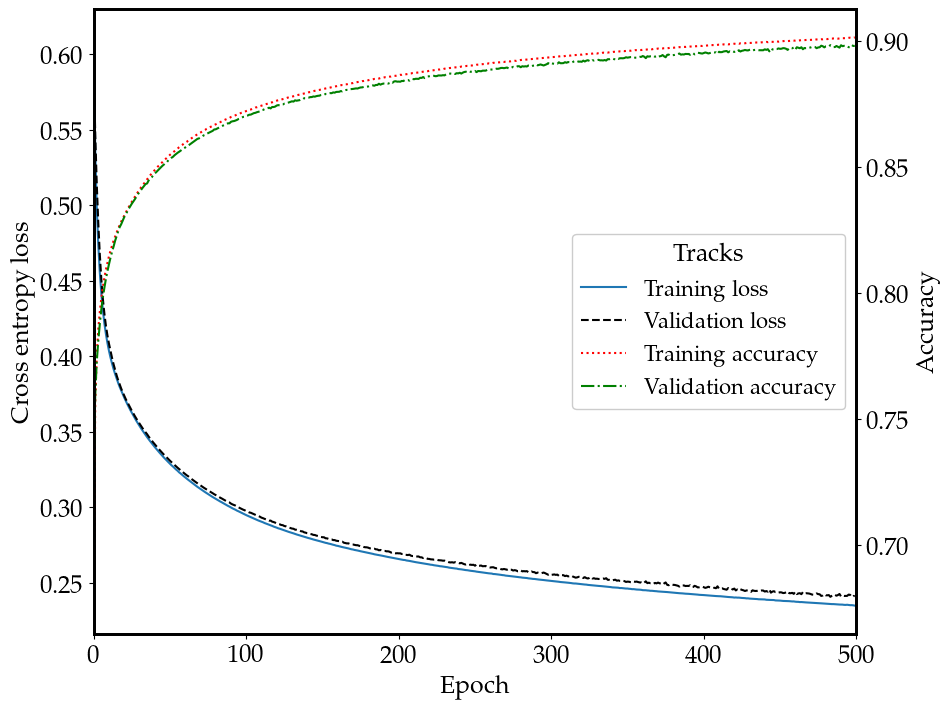

In [17]:
fig, ax1 = plt.subplots(figsize=([6.4*1.5, 4.8*1.5]))
ax1.plot(graphs['loss'], label='Training loss')
ax1.plot(graphs['val_loss'], label='Validation loss', ls = '--', color = 'k')

ax2 = ax1.twinx()
ax2.plot(graphs['accuracy'], label='Training accuracy', ls = ':', color = 'r')
ax2.plot(graphs['val_accuracy'], label='Validation accuracy', ls = '-.', color = 'g')

ax1.set_xlabel('Epoch')
ax1.set_xlim(0,500)
ax1.set_ylabel("Cross entropy loss")
ax2.set_ylabel("Accuracy")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

fig.legend(handles,labels,framealpha=1, title = 'Tracks',
          loc='center right',frameon=True,bbox_to_anchor=(1,0.5),bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.savefig("plots/training_results_tracks.pdf")
plt.show()

# Plot ROC curve

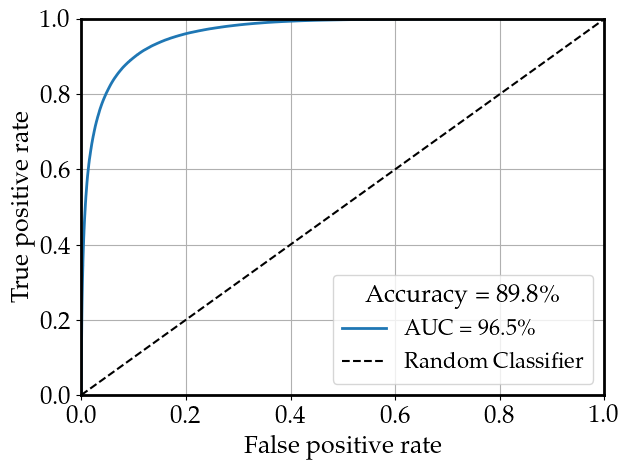

In [19]:
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc(fpr,tpr)*100:.1f}\%")
plt.plot(np.linspace(0,1),np.linspace(0,1),color='k',ls='--',label = 'Random Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()
plt.legend(loc='lower right', title=f'Accuracy = {accuracy*100:.1f}\%')
plt.tight_layout()
plt.savefig("plots/ROC_MLP_tracks.pdf")
plt.show()

# Create KS histogram of classifier output to check for overtraining

In [20]:
fig = make_ks_plot(y_train[:,0], predict_array_train[:,0],
                   y_test[:,0], predict_array_test[:,0])
fig.savefig("plots/KS_MLP_tracks.pdf")

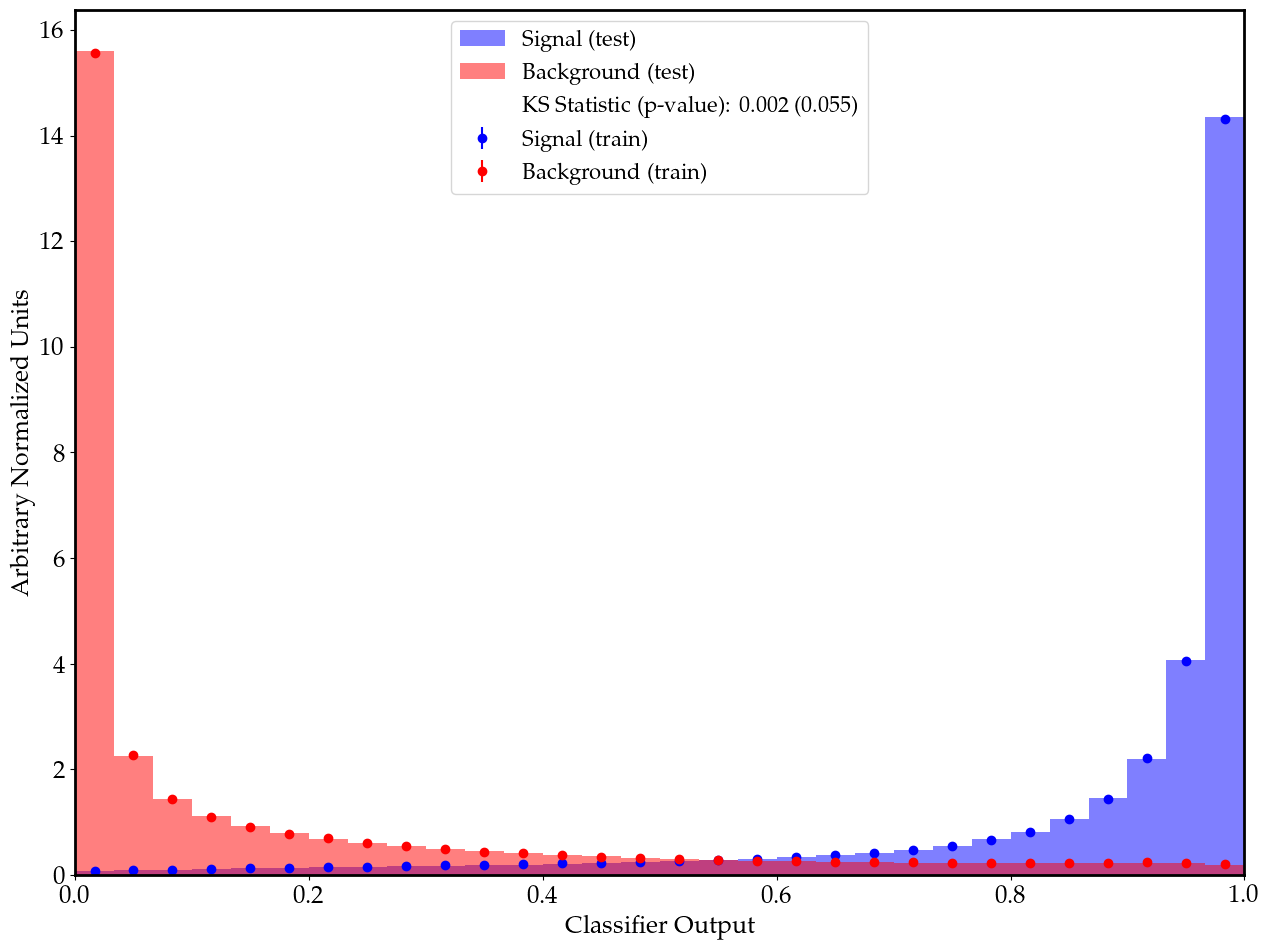

In [21]:
fig